# Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [282]:
pd_train=pd.read_csv('D:\\Hackathon\\Loan Prediction\\train_loan.csv')
pd_test=pd.read_csv('D:\\Hackathon\\Loan Prediction\\test_loan.csv')

In [283]:
pd_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Checking Unique values for each columns

In [284]:
pd_train.shape, pd_test.shape

((614, 13), (367, 12))

In [285]:
pd_train.columns, pd_test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [286]:
pd_train.dtypes, pd_test.dtypes

(Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object,
 Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome      int64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 dtype: object)

In [287]:
pd_train.nunique(),pd_test.nunique()

(Loan_ID              614
 Gender                 2
 Married                2
 Dependents             4
 Education              2
 Self_Employed          2
 ApplicantIncome      505
 CoapplicantIncome    287
 LoanAmount           203
 Loan_Amount_Term      10
 Credit_History         2
 Property_Area          3
 Loan_Status            2
 dtype: int64,
 Loan_ID              367
 Gender                 2
 Married                2
 Dependents             4
 Education              2
 Self_Employed          2
 ApplicantIncome      314
 CoapplicantIncome    194
 LoanAmount           144
 Loan_Amount_Term      12
 Credit_History         2
 Property_Area          3
 dtype: int64)

(Y    422
 N    192
 Name: Loan_Status, dtype: int64,
 Y    0.687296
 N    0.312704
 Name: Loan_Status, dtype: float64,
 <AxesSubplot:>)

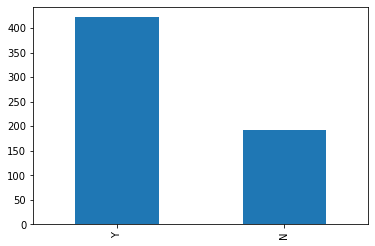

In [288]:
pd_train['Loan_Status'].value_counts(),pd_train['Loan_Status'].value_counts(normalize=True),pd_train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

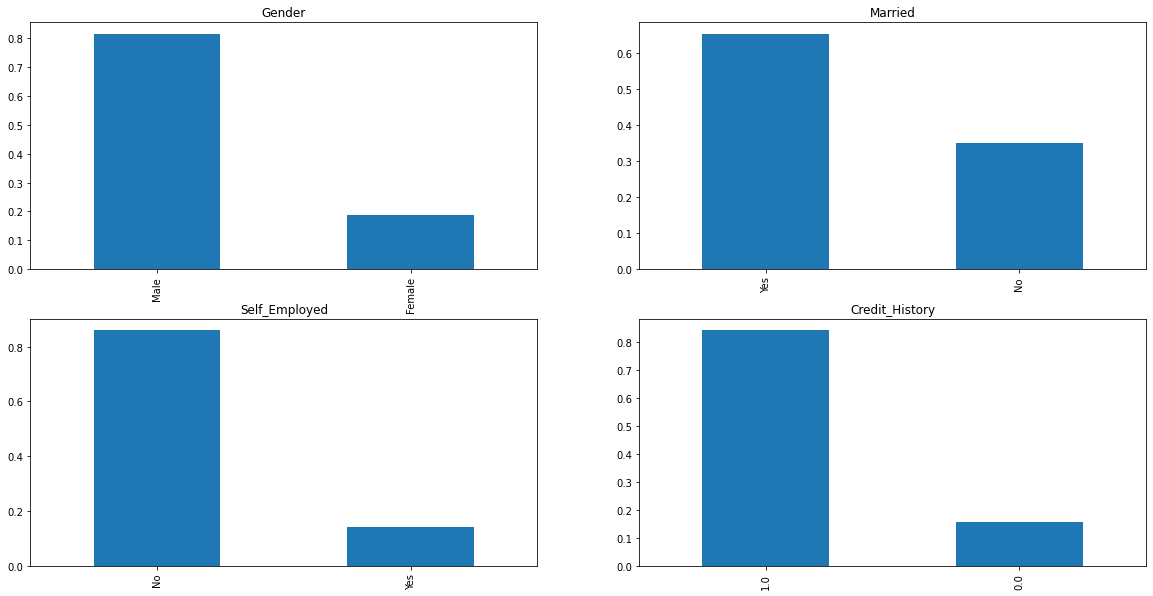

In [289]:

plt.figure(1) 
plt.subplot(221)
pd_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
pd_train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
pd_train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
pd_train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

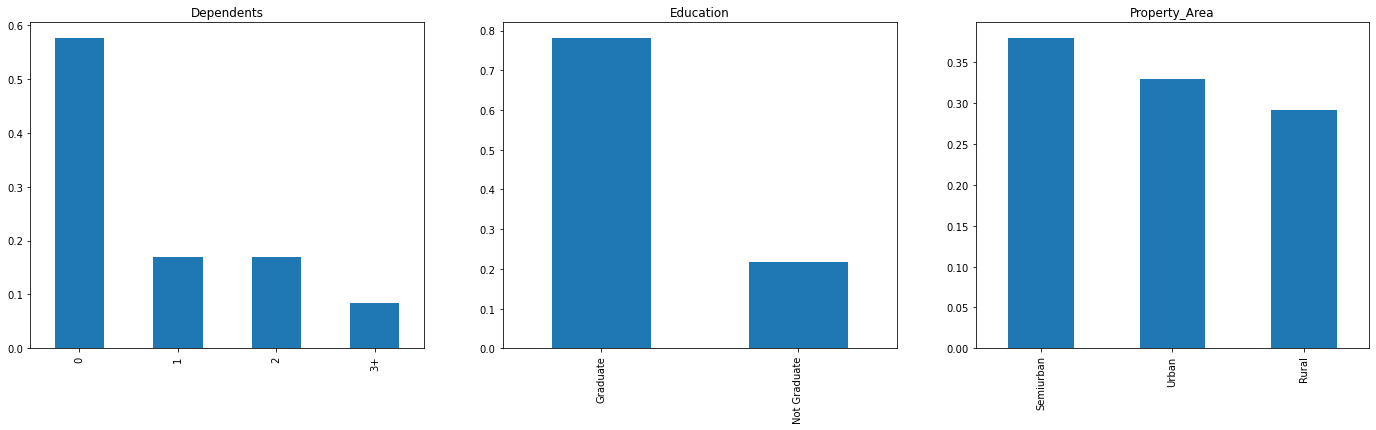

In [290]:

plt.figure(1) 
plt.subplot(131)
pd_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
pd_train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
pd_train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')
plt.show()

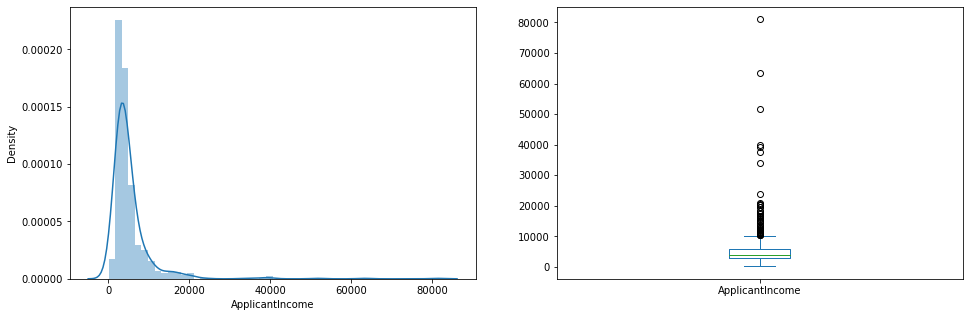

In [291]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(pd_train['ApplicantIncome']);
plt.subplot(122)
pd_train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

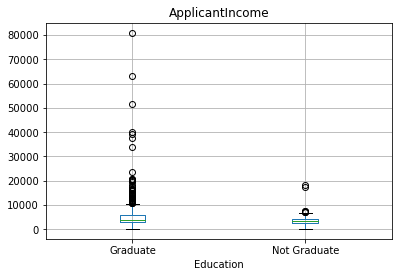

In [292]:
pd_train.boxplot(column='ApplicantIncome', by ='Education') 
plt.suptitle('')

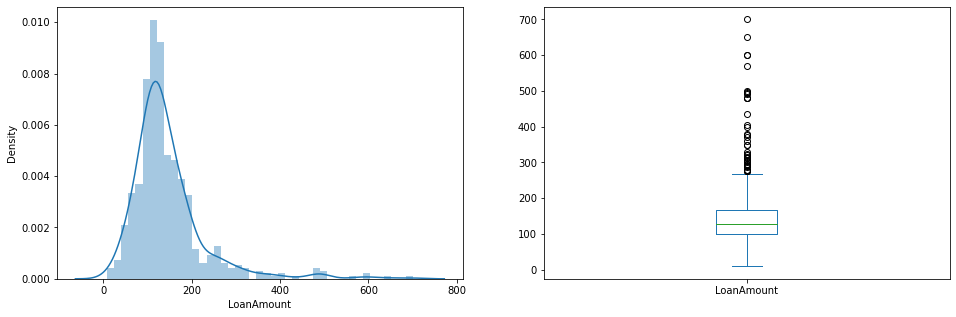

In [293]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(pd_train['LoanAmount']);
plt.subplot(122)
pd_train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Self_Employed'>

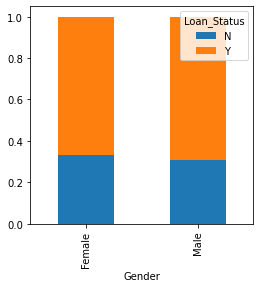

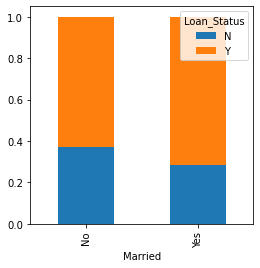

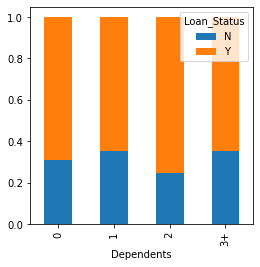

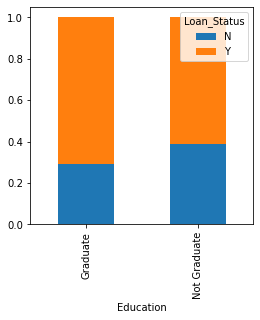

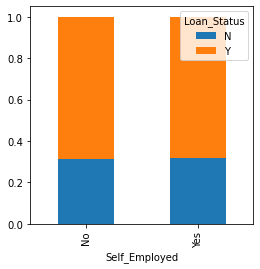

In [294]:
Gender=pd.crosstab(pd_train['Gender'],pd_train['Loan_Status'])
Married=pd.crosstab(pd_train['Married'],pd_train['Loan_Status'])
Dependents=pd.crosstab(pd_train['Dependents'],pd_train['Loan_Status'])
Education=pd.crosstab(pd_train['Education'],pd_train['Loan_Status'])
self_Employed=pd.crosstab(pd_train['Self_Employed'],pd_train['Loan_Status'])



Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
self_Employed.div(self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


<AxesSubplot:xlabel='Property_Area'>

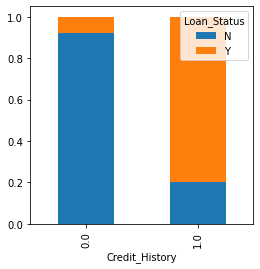

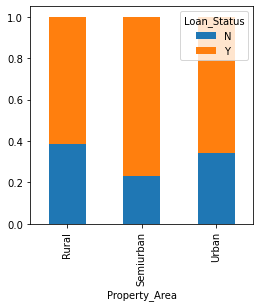

In [295]:
Credit_History=pd.crosstab(pd_train['Credit_History'],pd_train['Loan_Status'])
Property_Area=pd.crosstab(pd_train['Property_Area'],pd_train['Loan_Status'])


Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


<AxesSubplot:xlabel='Loan_Status'>

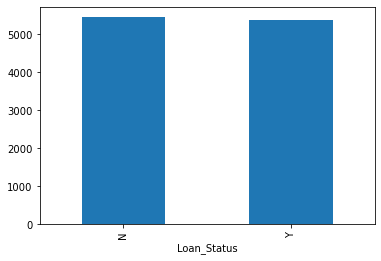

In [296]:
pd_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<AxesSubplot:xlabel='Income_bin'>

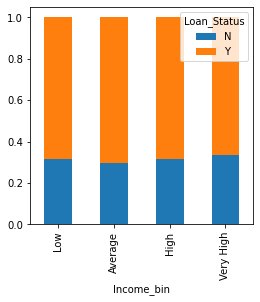

In [297]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
pd_train['Income_bin']=pd.cut(pd_train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(pd_train['Income_bin'],pd_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


<AxesSubplot:xlabel='Coapplicant_Income_bin'>

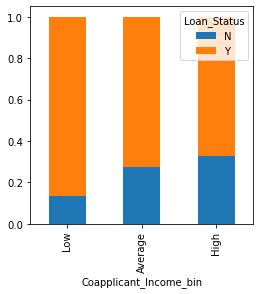

In [298]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
pd_train['Coapplicant_Income_bin']=pd.cut(pd_train['CoapplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(pd_train['Coapplicant_Income_bin'],pd_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


<AxesSubplot:xlabel='LoanAmount_bin'>

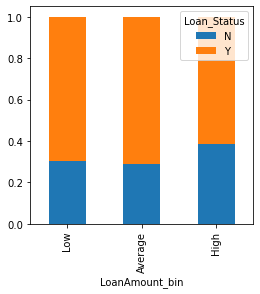

In [299]:
bins=[0,100,200,700] 
group=['Low','Average','High']
pd_train['LoanAmount_bin']=pd.cut(pd_train['LoanAmount'],bins,labels=group)
Income_bin=pd.crosstab(pd_train['LoanAmount_bin'],pd_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


In [300]:
pd_train=pd_train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin'],axis=1)

In [301]:
pd_train['Dependents'].replace('3+',3,inplace=True)
pd_test['Dependents'].replace('3+',3,inplace=True)
pd_train['Loan_Status'].replace('Y',1,inplace=True)
pd_train['Loan_Status'].replace('N',0,inplace=True)

<AxesSubplot:>

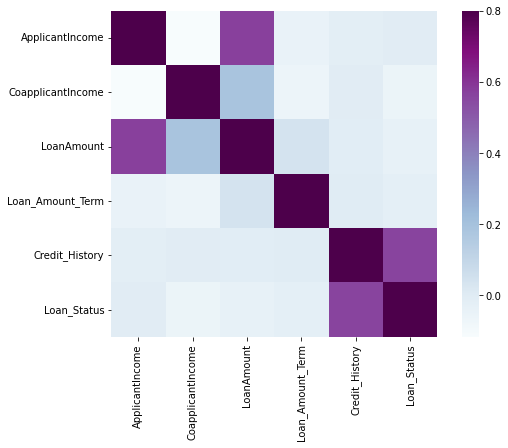

In [302]:
matrix=pd_train.corr() 
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

In [303]:
pd_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Imputation of null data by MODE and Median for categorical value

In [304]:
pd_train['Gender'].fillna(pd_train['Gender'].mode()[0],inplace=True)
pd_train['Married'].fillna(pd_train['Married'].mode()[0],inplace=True)
pd_train['Dependents'].fillna(pd_train['Dependents'].mode()[0],inplace=True)
pd_train['Self_Employed'].fillna(pd_train['Self_Employed'].mode()[0],inplace=True)
pd_train['Credit_History'].fillna(pd_train['Credit_History'].mode()[0],inplace=True)

In [305]:
pd_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [306]:
pd_train['Loan_Amount_Term'].fillna(pd_train['Loan_Amount_Term'].mode()[0],inplace=True)

In [307]:
pd_train['LoanAmount'].fillna(pd_train['LoanAmount'].median(),inplace=True)

In [308]:
pd_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [309]:
pd_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [310]:
pd_test['Gender'].fillna(pd_test['Gender'].mode()[0],inplace=True)
pd_test['Dependents'].fillna(pd_test['Dependents'].mode()[0],inplace=True)
pd_test['Self_Employed'].fillna(pd_test['Self_Employed'].mode()[0],inplace=True)
pd_test['Credit_History'].fillna(pd_test['Credit_History'].mode()[0],inplace=True)
pd_test['Loan_Amount_Term'].fillna(pd_test['Loan_Amount_Term'].mode()[0],inplace=True)
pd_test['LoanAmount'].fillna(pd_test['LoanAmount'].median(),inplace=True)

In [311]:
pd_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Transforming data using log to normalize

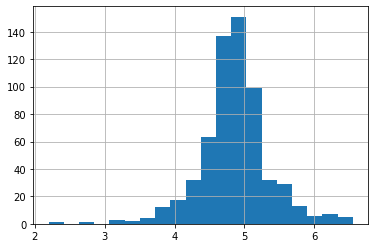

In [312]:
pd_train['LoanAmount_log']=np.log(pd_train['LoanAmount'])
pd_train['LoanAmount_log'].hist(bins=20)
pd_test['LoanAmount_log']=np.log(pd_test['LoanAmount'])

Removing unnessary column

In [313]:
pd_train=pd_train.drop('Loan_ID',axis=1)
pd_test=pd_test.drop('Loan_ID',axis=1)

Breaking data in X & y for training data set

In [314]:
X=pd_train.drop('Loan_Status',1)
y=pd_train['Loan_Status']

Using get_dummies to create dummies columns

In [315]:
X=pd.get_dummies(X)

In [316]:
pd_train=pd.get_dummies(pd_train)
pd_test=pd.get_dummies(pd_test)

Using train test split to break data in train & test for training set

In [322]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2)

# Logistic regression

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [324]:
model=LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=0.05,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='l1',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', n_jobs=1, penalty='l1',
                   random_state=1, solver='liblinear')

In [325]:
pred_cv=model.predict(x_cv)

In [326]:
accuracy_score(y_cv,pred_cv)

0.7886178861788617

In [327]:
pred_test=model.predict(pd_test)

In [328]:
submission=pd.read_csv("D:\\Hackathon\\Loan Prediction\\sample_submission.csv")
submission['Loan_Status']=pred_test
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

# Stratified K-fold cross validation

In [329]:
from sklearn.model_selection import StratifiedKFold

In [354]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y): print('\n{} of kfold{}'.format(i,kf.n_splits))
xtr,xvl=X.iloc[train_index],X.iloc[test_index]
ytr,yvl=y.iloc[train_index],y.iloc[test_index] 
model=LogisticRegression(random_state=1)
model.fit(xtr,ytr)
pred_test=model.predict(xvl)
score=accuracy_score(yvl,pred_test)
i+=1
print('accuracy_score',score)
pred_test=model.predict(pd_test)
pred=model.predict_proba(xvl)[:,1]                                                                                    


1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5
accuracy_score 0.7950819672131147


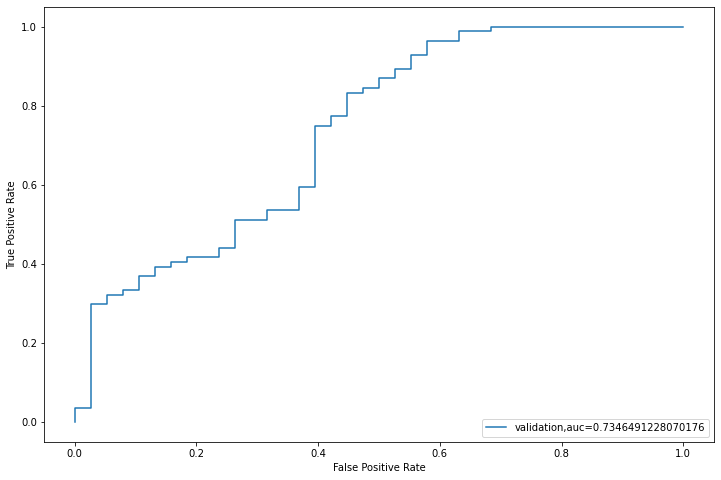

In [331]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [332]:
submission['Loan_Status']=pred_test
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic_CV.csv')

Creating new columns and dropping old one

In [333]:
pd_train['Total_Income']=pd_train['ApplicantIncome']+pd_train['CoapplicantIncome']
pd_test['Total_Income']=pd_test['ApplicantIncome']+pd_test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

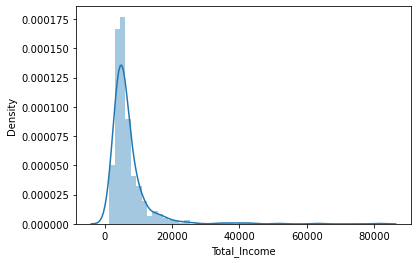

In [334]:
sns.distplot(pd_train['Total_Income'])

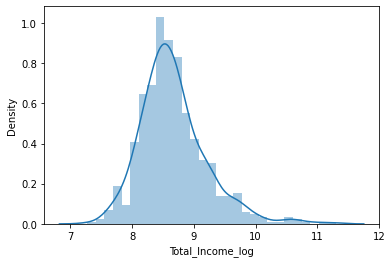

In [335]:
pd_train['Total_Income_log']=np.log(pd_train['Total_Income'])
sns.distplot(pd_train['Total_Income_log'])
pd_test['Total_Income_log']=np.log(pd_test['Total_Income'])

In [336]:
pd_train['EMI']=pd_train['LoanAmount']/pd_train['Loan_Amount_Term']
pd_test['EMI']=pd_test['LoanAmount']/pd_test['Loan_Amount_Term']

In [337]:
pd_train['Balance Income']=pd_train['Total_Income']-(pd_train['EMI']*1000)
pd_test['Balance Income']=pd_test['Total_Income']-(pd_test['EMI']*1000)

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

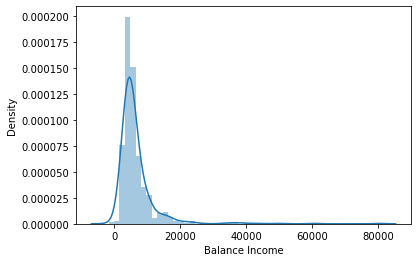

In [338]:
sns.distplot(pd_train['Balance Income'])

In [339]:
pd_train=pd_train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
pd_test=pd_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

# Decision Tree

In [151]:
from sklearn import tree

In [356]:
kf=StratifiedKFold(n_splits=7,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
xtr,xvl=X.iloc[train_index],X.iloc[test_index]
ytr,yvl=y[train_index],y[test_index] 
model=tree.DecisionTreeClassifier(random_state=1)
model.fit(xtr,ytr)
pred_test=model.predict(xvl)
score=accuracy_score(yvl,pred_test)
i+=1
print('accuracy_score',score)
pred_test=model.predict(pd_test)



1 of kfold7

1 of kfold7

1 of kfold7

1 of kfold7

1 of kfold7

1 of kfold7

1 of kfold7
accuracy_score 0.7931034482758621


In [355]:
submission=pd.read_csv("D:\\Hackathon\\Loan Prediction\\sample_submission.csv")
submission['Loan_Status']=pred_test
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Decision_Tree.csv')

# Random Forest

In [357]:
from sklearn.ensemble import RandomForestClassifier

In [362]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
xtr,xvl=X.iloc[train_index],X.iloc[test_index]
ytr,yvl=y[train_index],y[test_index] 
model=RandomForestClassifier(random_state=1)
model.fit(xtr,ytr)
pred_test=model.predict(xvl)
score=accuracy_score(yvl,pred_test)
print('accuracy_score',score)
i+=1
pred_test=model.predict(pd_test)


1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5
accuracy_score 0.7377049180327869


# Using Grid Search

In [363]:
from sklearn.model_selection import GridSearchCV

In [364]:
paramgrid={'max_depth':list(range(1,20,1)),'n_estimators':list(range(1,200,10))}

In [365]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [367]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
xtr,xvl=X.iloc[train_index],X.iloc[test_index]
ytr,yvl=y[train_index],y[test_index] 

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search.fit(xtr,ytr)
pred_test=grid_search.predict(xvl)
score=accuracy_score(yvl,pred_test)
i+=1
print('accuracy_score',score)
pred_test=grid_search.predict(pd_test)


1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5
accuracy_score 0.7950819672131147


In [368]:
submission=pd.read_csv("D:\\Hackathon\\Loan Prediction\\sample_submission.csv")
submission['Loan_Status']=pred_test
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic_GCVj.csv')

Fixed Numbers

In [369]:
from sklearn.model_selection import train_test_split
X=pd_train.drop('Loan_Status',1)
y=pd_train['Loan_Status']
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2,random_state=1)

In [370]:
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None,error_score='raise',estimator=RandomForestClassifier(bootstrap=True,class_weight=None,criterion='gini',max_depth=None,max_features='auto',max_leaf_nodes=None,
            min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,
            n_estimators=10,n_jobs=1,oob_score=False,random_state=1,warm_start=False),n_jobs=1,
            param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19],'n_estimators':[1,21,31,41,51,61,81,101,121,141,161,181]},pre_dispatch='2*n_jobs',
             refit=True,return_train_score='warn',scoring=None)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 31, 41, 51, 61, 81, 101, 121,
                                          141, 161, 181]},
             return_train_score='warn')

In [371]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=151, random_state=1)

In [372]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
xtr,xvl=X.iloc[train_index],X.iloc[test_index]
ytr,yvl=y[train_index],y[test_index] 

grid_search=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=151)
grid_search.fit(xtr,ytr)
pred_test=grid_search.predict(xvl)
score=accuracy_score(yvl,pred_test)
print('accuracy_score',score)
i+=1
pred_test=grid_search.predict(pd_test)
pred2=model.predict_proba(pd_test)[:,1]


1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5
accuracy_score 0.7950819672131147


In [373]:
submission=pd.read_csv("D:\\Hackathon\\Loan Prediction\\sample_submission.csv")
submission['Loan_Status']=pred_test
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic_GCVjm.csv')

Check important features

<AxesSubplot:>

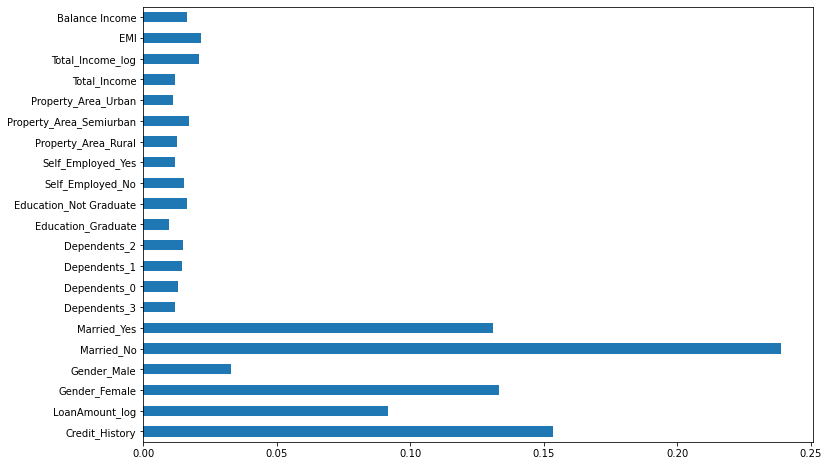

In [374]:
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

# XGBoost

In [375]:
from xgboost import XGBClassifier

In [384]:
i=1
kf=StratifiedKFold(n_splits=5
                   ,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
xtr,xvl=X.iloc[train_index],X.iloc[test_index]
ytr,yvl=y[train_index],y[test_index] 

xgb=XGBClassifier(max_depth=3,n_estimators=32)
xgb.fit(xtr,ytr)
pred_test=xgb.predict(xvl)
score=accuracy_score(yvl,pred_test)
print('accuracy_score',score)
i+=1
pred_test=xgb.predict(pd_test)
pred3=xgb.predict_proba(pd_test)[:,1]


1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5

1 of kfold5
[22:24:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8032786885245902


In [385]:
submission=pd.read_csv("D:\\Hackathon\\Loan Prediction\\sample_submission.csv")
submission['Loan_Status']=pred_test
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic_xgb.csv')